Kaggle link:
https://www.kaggle.com/datasets/mirbektoktogaraev/should-this-loan-be-approved-or-denied?select=SBAnational.csv

In [3]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import roc_curve,auc

In [4]:
#Load up data 
trainfile=r'C:\Users\olive\OneDrive\Documents\Lab Work IOD\Presentations\Capstone\SBAnational.csv'
banking = pd.read_csv(trainfile, header=0)
banking

C:\Users\olive\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,...,0,N,NaN,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,...,Y,N,NaN,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00"
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,...,N,N,NaN,30-Sep-97,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00"
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,...,N,Y,8-Mar-00,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00"


# Rundown
Here we have a large dataset that includes many small businesses and their applications for loans. We are trying to answer to question on should a loan be approved or denied on the basis of whether the loan will default or not

# EDA
Loaded up the Data but need to make it more useable for modelling
## Data Cleaning
Want to clean up data for accessibility

In [5]:
#Drop the initial unneeded columns
banking.drop('LoanNr_ChkDgt', inplace=True,axis=1)
banking.drop('Name', inplace=True,axis=1)
banking.drop('Bank', inplace=True,axis=1)
banking.drop('ChgOffPrinGr', inplace=True,axis=1)
banking.drop('ApprovalDate', inplace=True,axis=1)
banking.drop('ChgOffDate', inplace=True,axis=1)
banking.drop('DisbursementDate', inplace=True,axis=1)
banking.drop('BalanceGross', inplace=True,axis=1)
banking.drop('BankState', inplace=True,axis=1)


These are the initial cells we are going to delete as we do not need them for our modelling.

Will now look at all the remaining columns initial types

In [6]:
banking.dtypes

City                  object
State                 object
Zip                    int64
NAICS                  int64
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
DisbursementGross     object
MIS_Status            object
GrAppv                object
SBA_Appv              object
dtype: object

will like to check the difference between gross amount apporoved by the bank vs amount disbursed so need to convert these two into floats


In [7]:
#Get rid of dollar sign and comma and other stuff in relevant columns
#$ 
banking['DisbursementGross']=banking['DisbursementGross'].replace({'\$':''}, regex = True)
banking['SBA_Appv']=banking['SBA_Appv'].replace({'\$':''}, regex = True)
banking['GrAppv']=banking['GrAppv'].replace({'\$':''}, regex = True)
#,
banking['DisbursementGross']=banking['DisbursementGross'].replace({'\,':''}, regex = True)
banking['SBA_Appv']=banking['SBA_Appv'].replace({'\,':''}, regex = True)
banking['GrAppv']=banking['GrAppv'].replace({'\,':''}, regex = True)
#1976A->1976
banking['ApprovalFY']=banking['ApprovalFY'].replace({'1976A':1976}, regex = True)

In [8]:
#convert needed columns to floats
banking['DisbursementGross']=banking['DisbursementGross'].astype(float)
banking['ApprovalFY']=banking['ApprovalFY'].astype(float)
banking['SBA_Appv']=banking['SBA_Appv'].astype(float)
banking['GrAppv']=banking['GrAppv'].astype(float)

Now that we have the right types for the columns lets see the difference between the Disbursed amount column and the Gross amount approved and get a description on the new column

In [9]:
banking['diff']=banking['GrAppv']-banking['DisbursementGross']

In [10]:
banking['diff'].describe()

count    8.991640e+05
mean    -8.467040e+03
std      6.859594e+04
min     -9.446325e+06
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.500000e+06
Name: diff, dtype: float64

From what we see the overall difference between the two isn't big as majority of the discrepancies are 0 so we will keep the Gross amount approved as that is the amount the bank was willing to loan out to said business

In [11]:
#Drop diff and DisbursementGross columns
banking.drop('diff', inplace=True,axis=1)
banking.drop('DisbursementGross', inplace=True,axis=1)

In [12]:
#Check for null values
banking.isnull().sum()

City               30
State              14
Zip                 0
NAICS               0
ApprovalFY          0
Term                0
NoEmp               0
NewExist          136
CreateJob           0
RetainedJob         0
FranchiseCode       0
UrbanRural          0
RevLineCr        4528
LowDoc           2582
MIS_Status       1997
GrAppv              0
SBA_Appv            0
dtype: int64

We can see there are a few null values for some of the categories we can drop these rows that have null values

In [13]:
#drop rows with null values
banking.dropna(inplace=True)

### Make Data numerical
Well go one by one and inspect each column and see what is best to be done when converting data to be numerical which includes the likes of using dummy variables. We will look at the value counts and then make the decision

#### Location based columns
The data provided gives a lot of detail for certain locations whether it be through city, state, zip code etc. 

In [14]:
#City
banking['City'].value_counts()

LOS ANGELES       11530
HOUSTON           10172
NEW YORK           7821
CHICAGO            5980
MIAMI              5566
                  ...  
Cross Plains          1
CELERON               1
Chateaugay            1
ST GEEORGE            1
SO. OZONE PARK        1
Name: City, Length: 32344, dtype: int64

In [15]:
#State
banking['State'].value_counts()

CA    129796
TX     69768
NY     57124
FL     40869
PA     34618
OH     32309
IL     29365
MA     24882
MN     24185
NJ     23897
WA     23041
GA     22096
WI     20813
MO     20450
CO     20413
MI     20352
UT     18657
AZ     17493
NC     14097
IN     13931
MD     13136
VA     12960
CT     12048
NH     11925
IA     11847
KS     11328
OR     10971
OK      9835
LA      9466
ID      9401
TN      9263
RI      8896
MT      8626
AL      8262
NV      7965
KY      7642
MS      7585
NE      6304
AR      6249
NM      5949
ME      5883
SC      5527
VT      5375
ND      5192
SD      4360
HI      3565
WV      3236
WY      2797
AK      2370
DE      2171
DC      1605
Name: State, dtype: int64

In [16]:
#Zip code
banking['Zip'].value_counts()

10001    928
90015    924
93401    752
90010    732
33166    669
        ... 
80936      1
37550      1
31650      1
49871      1
26134      1
Name: Zip, Length: 33539, dtype: int64

There is a lot of different zip codes and cities for each of these cases and can lead to a case of data being too stratified. so for this reason we will just have state as the location input

In [17]:
#Drop zip code and city
banking.drop('Zip', inplace=True,axis=1)
banking.drop('City', inplace=True,axis=1)

In [18]:
#Get dummy variables for states
state=pd.get_dummies(banking['State'])
#Drop California as the base
state.drop('CA', inplace=True,axis=1)

In [19]:
#Add the other dummy variables to the banking df and drop the State column
banking.drop('State', inplace=True,axis=1)
banking=banking.join(state)

#### Industry of the Borrower

In [20]:
banking['NAICS'].value_counts()

0         199447
722110     27823
722211     19364
811111     14429
621210     13913
           ...  
925120         1
312210         1
112420         1
524192         1
316212         1
Name: NAICS, Length: 1311, dtype: int64

As we can see there are a lot of values for the industry classification. However, the first 2 digits of each code gives an industry breakdown so we can take the first two digits of each

In [21]:
#get first two digits
banking['industry'] = banking['NAICS'].astype(str).str[:2]
#convert the type of industry column to a integer
banking['industry']=banking['industry'].astype(int)

In [22]:
#Now that have first 2 digits need to map the numbers to the relevant industry
ind_map={0:'Unspecified',11:"Agriculture, Forestry, Fishing and Hunting",21:'Mining, Quarrying, and Oil and Gas Extraction',22:'Utilities',23:'Construction',31:'Manufacturing',32:'Manufacturing',33:'Manufacturing',42:'Wholesale Trade',44:'Retail Trade',45:'Retail Trade',48:'Transportation and Warehousing',49:'Transportation and Warehousing',51:'Information',52:'Finance and Insurance',53:'Real Estate and Rental and Leasing',54:'Professional, Scientific, and Technical Services',55:'Management of Companies and Enterprises',56:'Administrative and Support and Waste Management and Remediation Services',61:'Educational Services',62:'Health Care and Social Assistance',71:'Arts, Entertainment, and Recreation',72:'Accommodation and Food Services',81:'Other Services',92:'Public Administration'}
#Implement mapping
industry_map=banking['industry'].map(ind_map)

In [23]:
#Put new industry column in original df and drop NAICS and industry column
banking.drop('NAICS', inplace=True,axis=1)
banking.drop('industry', inplace=True,axis=1)
banking.insert(1,'Ind',industry_map)

In [24]:
#Now get dummy variables for each of these industries
Ind_dummy=pd.get_dummies(banking['Ind'])
#Drop unspecified as the base
Ind_dummy.drop('Unspecified',inplace=True,axis=1)

In [25]:
#Add the dummy variables to banking and drop Ind column
banking=banking.join(Ind_dummy)
banking.drop('Ind',inplace=True,axis=1)

#### Other columns
The rest of these columns are just need converting from strings to numbers or changing the way they are numerically conveyed

In [26]:
#Need to change the New Exist column from 1 and 2 -> 0 and 1
banking['NewExist']=banking['NewExist'].map({2:1,1:0})

In [27]:
#When mapping get some null values so drop these
banking.dropna(inplace=True)

In [28]:
#Create a function to use to see if the borrower is a franchise or not
def franchise(x):
    if x <=1:
        return 0
    else:
        return 1

In [29]:
#Apply franchise function and then drop the franchise code column
banking['Franchise']=banking['FranchiseCode'].apply(franchise)
banking.drop('FranchiseCode',inplace=True,axis=1)

In [30]:
#Get dummies for the Urban/Rural column
urban=pd.get_dummies(banking['UrbanRural'])
#Rename columns
urban.rename(columns={0:'Undefined',1:'Urban',2:'Rural'},inplace=True)
#Drop undefined as a base
urban.drop('Undefined',inplace=True,axis=1)

In [31]:
#Add dummies to original dataframe and drop Urban/Rural Column
banking=banking.join(urban)
banking.drop('UrbanRural',inplace=True,axis=1)

In [32]:
#Look at values for Revolving credit line
banking['RevLineCr'].value_counts()

N    416390
0    257375
Y    199861
T     15181
1        22
R        14
`        11
2         6
C         2
3         1
,         1
7         1
A         1
5         1
.         1
4         1
-         1
Q         1
Name: RevLineCr, dtype: int64

In [33]:
#Look at values foe the LowDoc column
banking['LowDoc'].value_counts()

N    777825
Y    107883
0      1238
C       753
S       602
A       495
R        74
1         1
Name: LowDoc, dtype: int64

There are plenty of weird unexplained values for these column and would be best to just drop it

In [34]:
#Drop RevLineCr
banking.drop('RevLineCr',inplace=True,axis=1)
banking.drop('LowDoc',inplace=True,axis=1)

In [35]:
#Put Loan Status into numerical
banking['MIS_Status']=banking['MIS_Status'].map({'P I F':0, 'CHGOFF':1})

In [36]:
banking.describe()

,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,MIS_Status,GrAppv,SBA_Appv,AK,...,"Professional, Scientific, and Technical Services",Public Administration,Real Estate and Rental and Leasing,Retail Trade,Transportation and Warehousing,Utilities,Wholesale Trade,Franchise,Urban,Rural
count,888871.000000,888871.000000,888871.000000,888871.000000,888871.000000,888871.000000,888871.000000,8.888710e+05,8.888710e+05,888871.000000,...,888871.000000,888871.000000,888871.000000,888871.000000,888871.000000,888871.000000,888871.000000,888871.000000,888871.000000,888871.000000
mean,2001.139848,110.811750,11.408478,0.281282,8.467165,10.851433,0.175922,1.931152e+05,1.496637e+05,0.002660,...,0.075680,0.000251,0.015174,0.141785,0.024965,0.000737,0.054349,0.057681,0.524714,0.117163
std,5.898253,78.929659,73.885443,0.449625,237.479343,237.936999,0.380754,2.831746e+05,2.278961e+05,0.051502,...,0.264486,0.015837,0.122246,0.348830,0.156020,0.027136,0.226705,0.233139,0.499389,0.321615
min,1969.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+03,5.000000e+02,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1997.000000,60.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.500000e+04,2.125000e+04,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2002.000000,84.000000,4.000000,0.000000,0.000000,1.000000,0.000000,9.000000e+04,6.162500e+04,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2006.000000,120.000000,10.000000,1.000000,1.000000,4.000000,0.000000,2.250000e+05,1.750000e+05,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2014.000000,569.000000,9999.000000,1.000000,8800.000000,9500.000000,1.000000,5.000000e+06,4.500000e+06,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Relationship Finding
Now that we have all our data in numerical form meaning we can try to find some preliminary relations with our data. In the context of the question, the target variable is the MIS_Status column seeing if the borrower has defaulted on the loan or not. As the original dataframe has a lot of columns due to dummy variables especially of industry and State we will create a copy of the dataframe using these columns that arent industry or state related

In [37]:
#Create a sub dataframe with those specific columns
bank_sub=banking.copy()

In [38]:
#Drop the relevant columns for the sub
bank_sub.drop(bank_sub.iloc[:,9:-3],inplace = True, axis = 1)

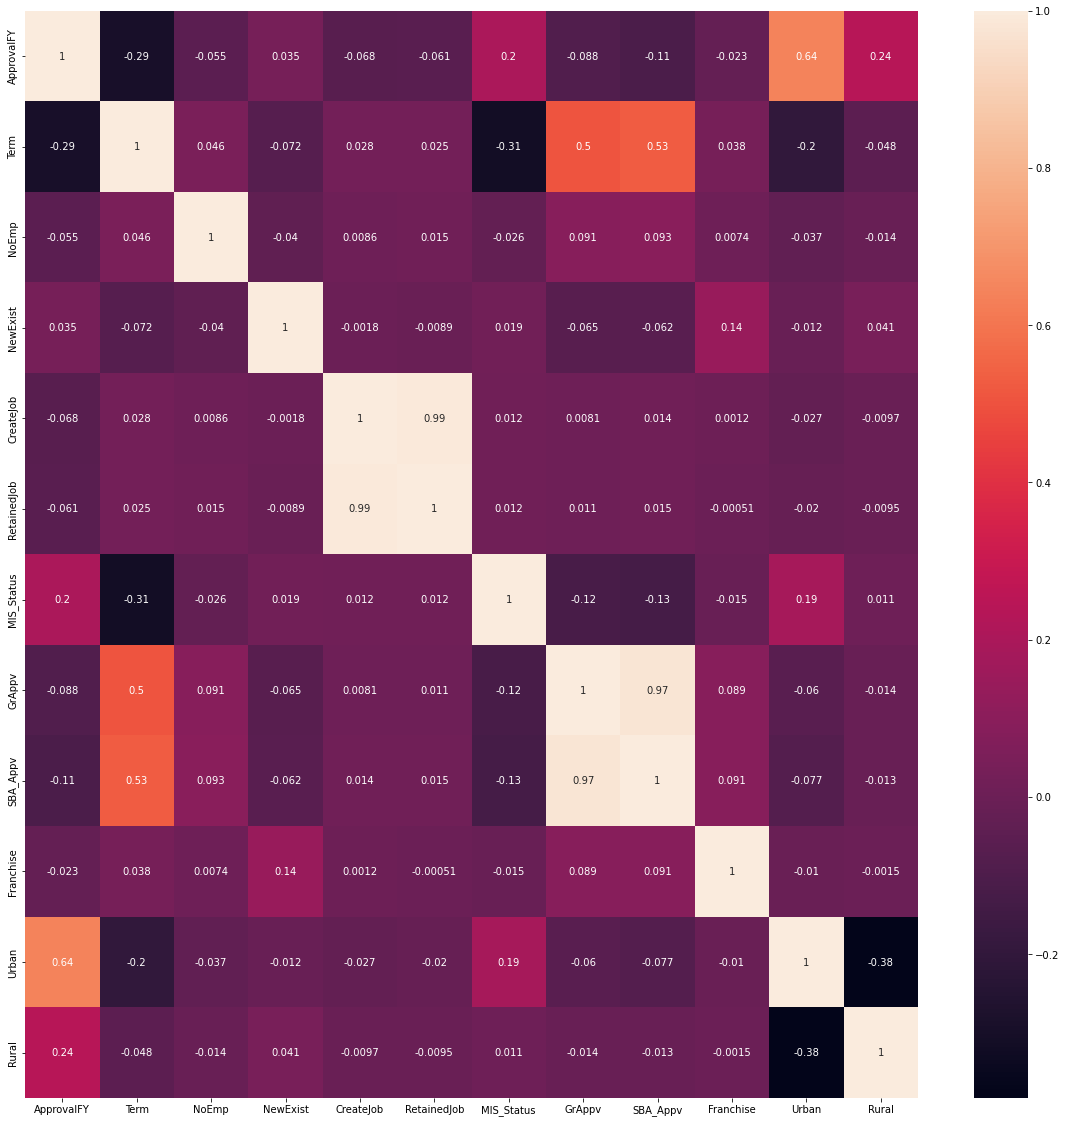

In [39]:
#Correlation matrix of banksub
corrMatrix = bank_sub.corr()
fig,ax =plt.subplots(figsize=(20,20))
sns.heatmap(corrMatrix, annot=True)
plt.show()

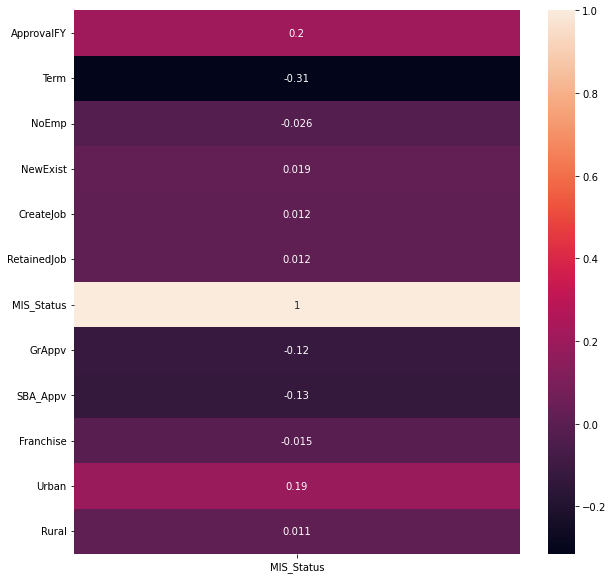

In [40]:
#Show correlation matrix of just the target column
corr=bank_sub.corr()
x=corr[['MIS_Status']]
fig,ax =plt.subplots(figsize=(10,10))
sns.heatmap(x,annot=True)
plt.show()

We can see that there isnt a high magnitude of correlation between the default status of a loan with the other simple inputs we have. This means that finding out if a loan defaults or not is not as simple. 

In terms of co-correlation with any other columns there is one high magnitude which is the gross amount approved and the gross amount secured by the SBA this is because the SBA is tied to a percentage of the gross amount approved because of this we will drop the secured amount so as not to be as sensitive to this data as a lot of the explanation of one column is explained with the other one.

In [39]:
#Drop SBA_Appv in both dataframes
bank_sub.drop('SBA_Appv',inplace = True, axis = 1)
banking.drop('SBA_Appv',inplace = True, axis = 1)

### Graphing Relations

In [54]:
#Defaulted vs not defaults
banking['MIS_Status'].value_counts()

0    732499
1    156372
Name: MIS_Status, dtype: int64

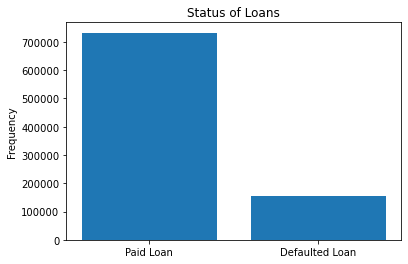

In [57]:
#Bar chart of Default vs Paid
number=[732499,156372]
status=['Paid Loan','Defaulted Loan']
plt.bar(status,number)
plt.title('Status of Loans')
plt.ylabel('Frequency')
plt.show()

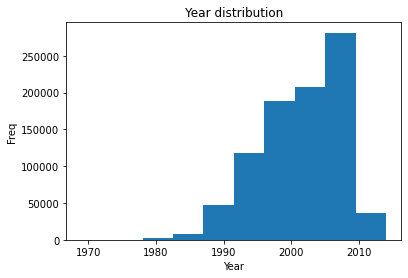

In [40]:
#Approval year
plt.hist(banking['ApprovalFY'])
plt.title("Year distribution")
plt.xlabel('Year')
plt.ylabel('Freq')
plt.show()
#colour code with with default or not (2 different histograms)

Can see that the data is more skewed towards more recent years which is fine can also hint to a habit of loans being more common now than before as well as the prevalence of more businesses

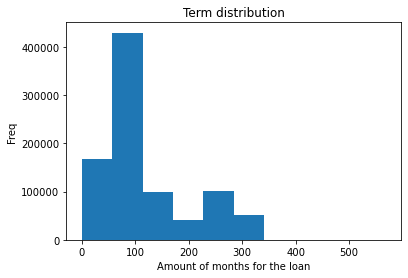

In [41]:
#Term length
plt.hist(banking['Term'])
plt.title("Term distribution")
plt.xlabel('Amount of months for the loan')
plt.ylabel('Freq')
plt.show()

Shows that these loan lengths tend to be 100 months or less which equates to approximately 8 years would be interesting to see if the longer loans have a more common default rate.

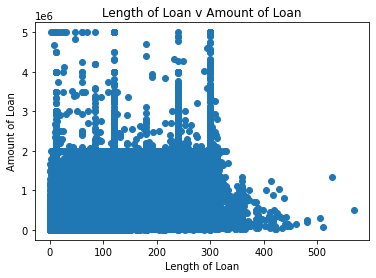

In [53]:
#Length vs Amount
plt.scatter(banking['Term'],banking['GrAppv'])
plt.title('Length of Loan v Amount of Loan')
plt.xlabel('Length of Loan')
plt.ylabel('Amount of Loan')
plt.show()

No clear relation of as the length of a loan increases the amount does as well

C:\Users\olive\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


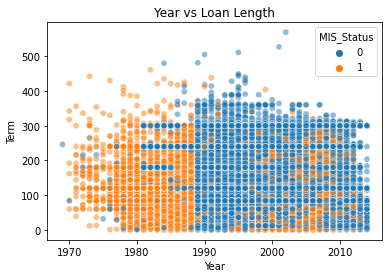

In [42]:
#scatter of year and length of loan
sns.scatterplot(banking['ApprovalFY'],banking['Term'],hue=banking['MIS_Status'],data=banking,alpha=.5)
plt.title('Year vs Loan Length')
plt.xlabel('Year')
plt.ylabel('Term')
plt.show()

As we can see there is no clear increase in the length of loans given out as the years go by but there is quite a large representation of defaulted loans in the earlier years this could be due to the large portion of data being represented in these years from 1990 onwards and loans not defaulting being the more common so it blocks out much of the defaulted loans

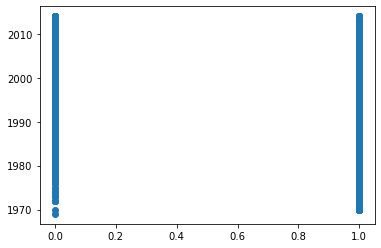

In [43]:
plt.scatter(banking['MIS_Status'],banking['ApprovalFY'])
plt.show()

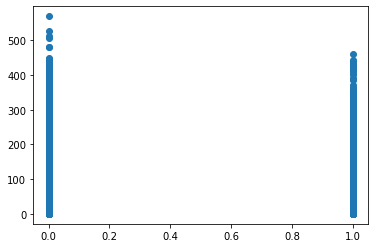

In [44]:
plt.scatter(banking['MIS_Status'],banking['Term'])
plt.show()

Looks to be little distinction between how long the term of the loan is and whether it had defaulted or not and the same goes for the year and whether it has defaulted or not.

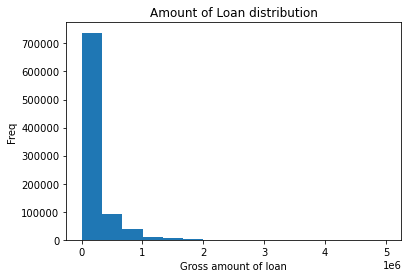

In [45]:
#Loaned amount
plt.hist(banking['GrAppv'],bins=15)
plt.title("Amount of Loan distribution")
plt.xlabel('Gross amount of loan')
plt.ylabel('Freq')
plt.show()

This shows that majority of loans are more in the tens of thousands range whilst their are a minority on the millions range

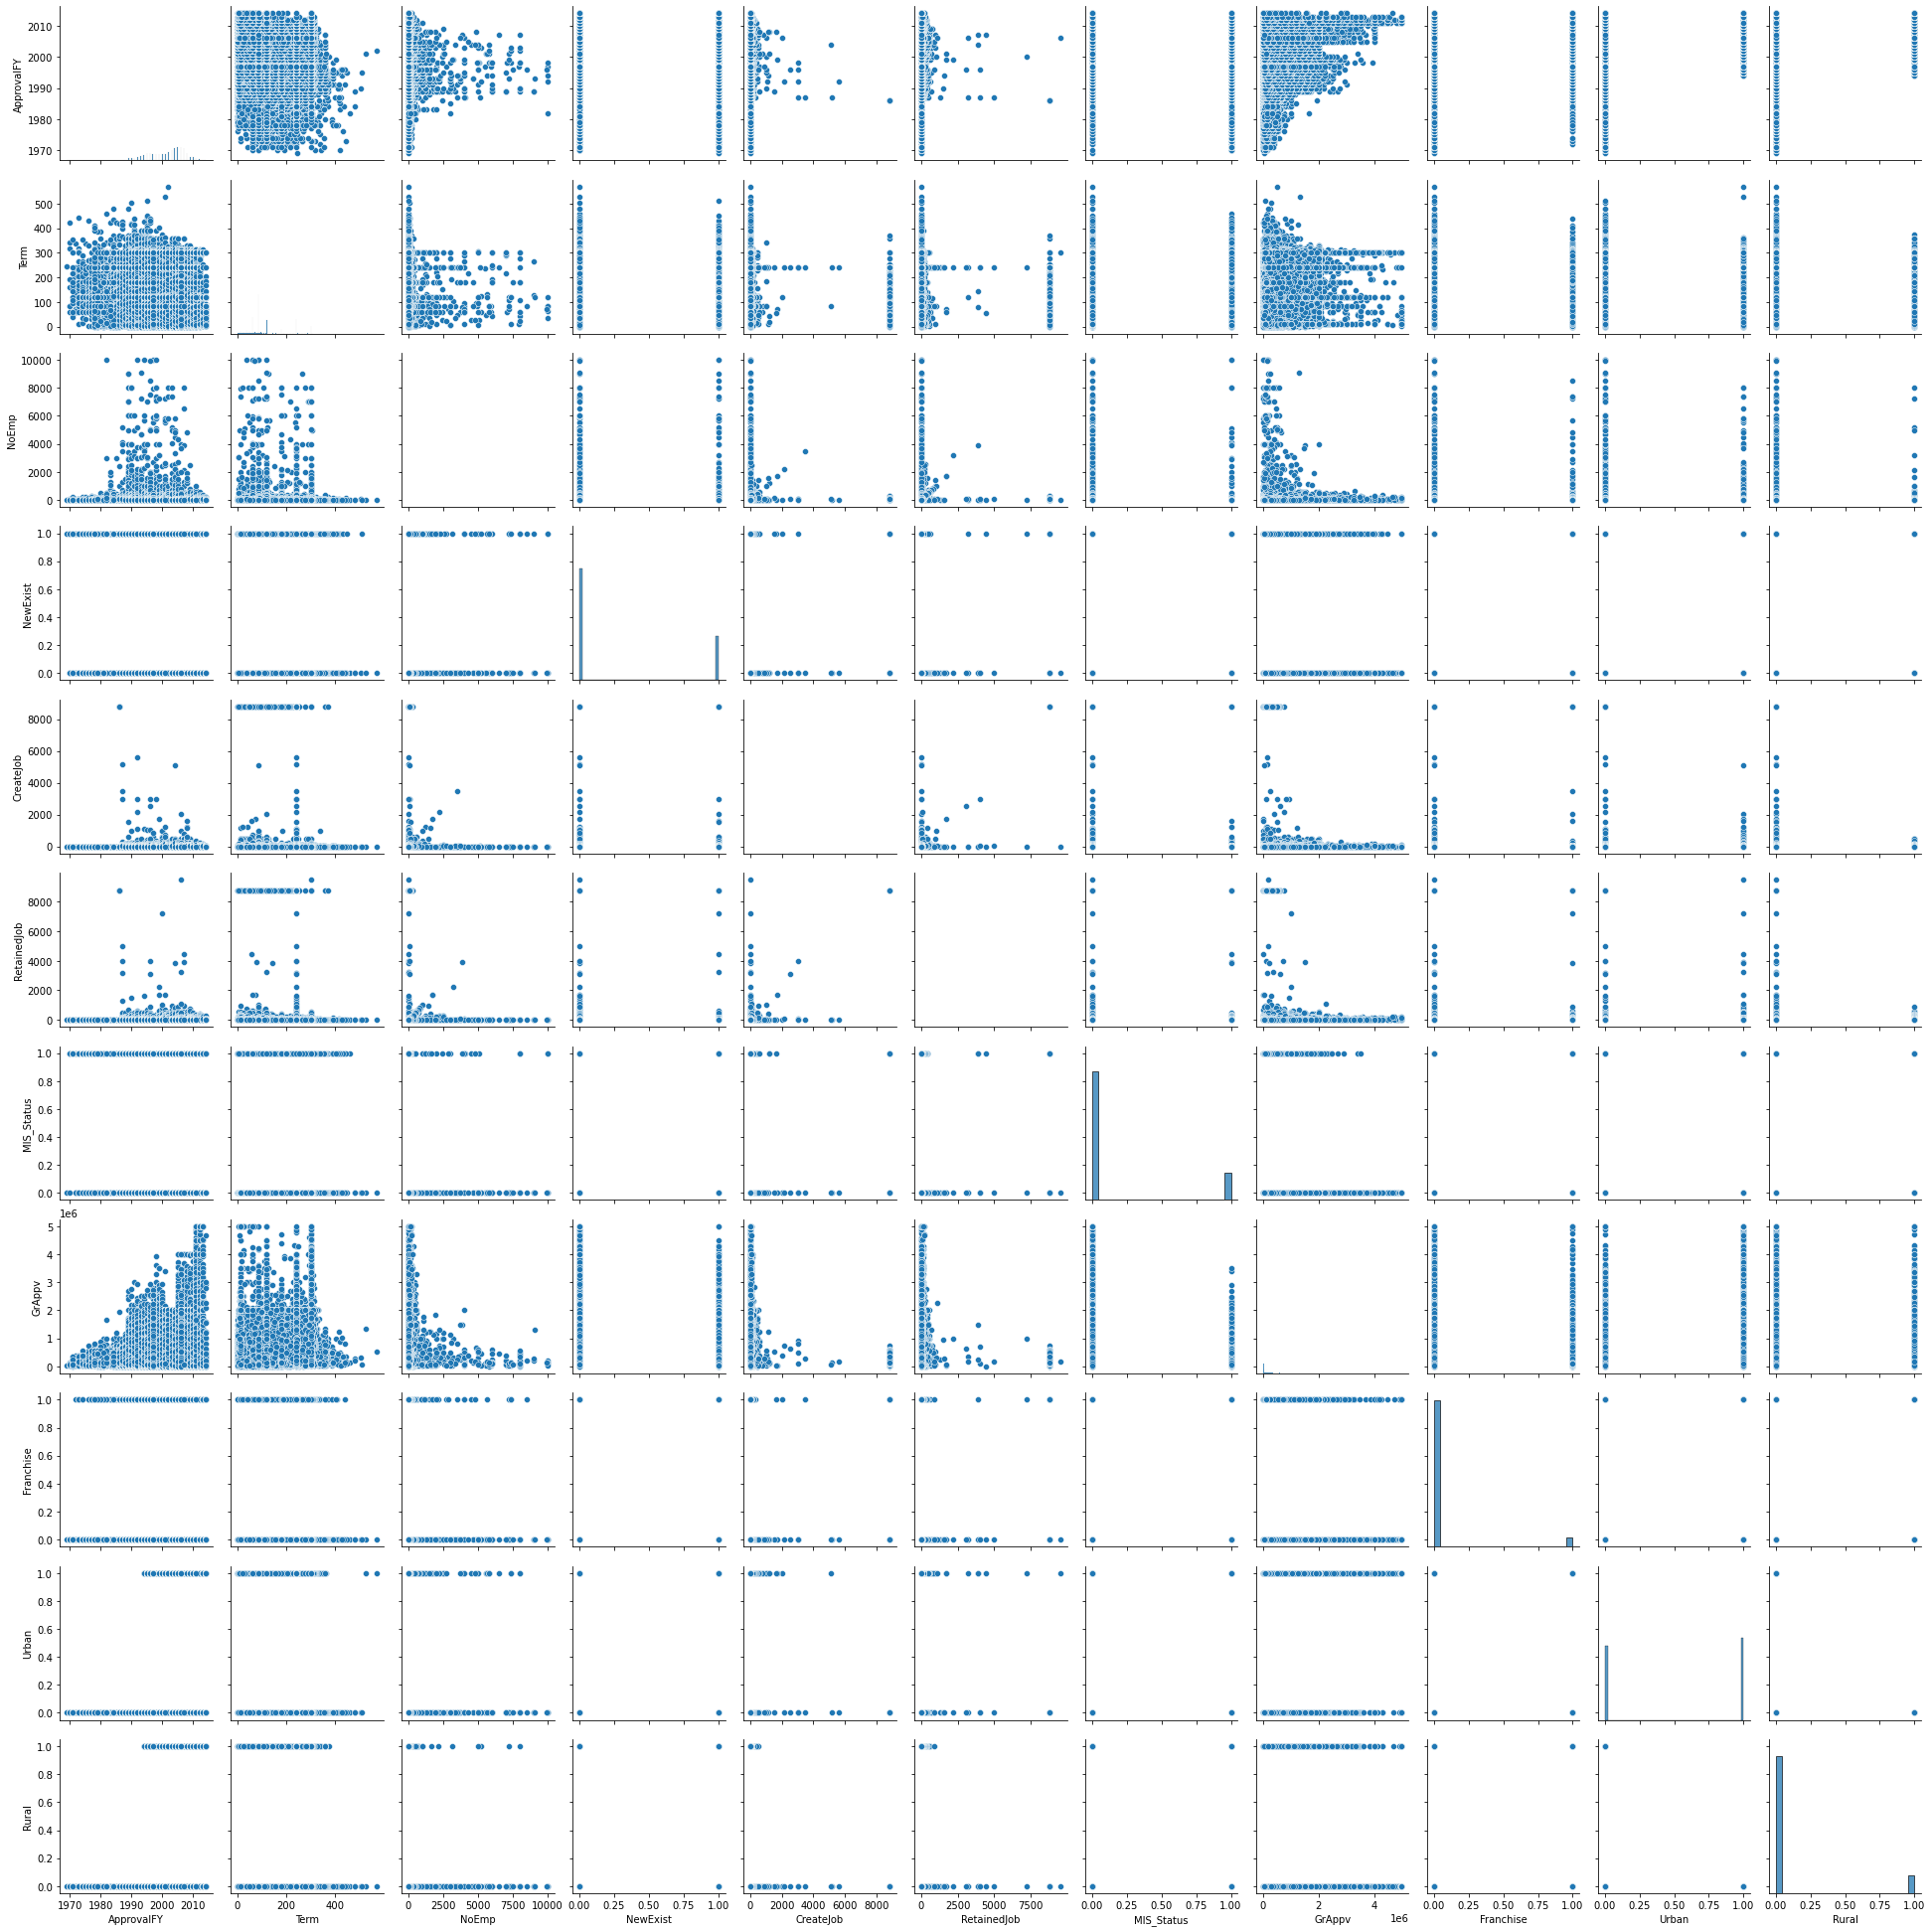

In [52]:
sns.pairplot(bank_sub)
plt.show()

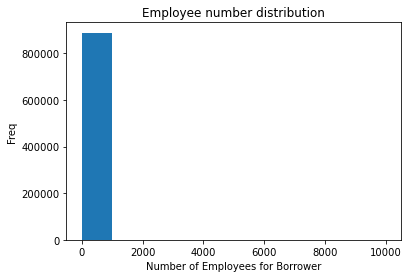

In [46]:
#Loaned amount
plt.hist(banking['NoEmp'])
plt.title("Employee number distribution")
plt.xlabel('Number of Employees for Borrower')
plt.ylabel('Freq')
plt.show()


In [47]:
banking['NoEmp'].value_counts()

1       151977
2       136708
3        89651
4        72871
5        59690
         ...  
414          1
604          1
1280         1
3089         1
3713         1
Name: NoEmp, Length: 595, dtype: int64

In [48]:
banking['NoEmp'].describe()

count    888871.000000
mean         11.408478
std          73.885443
min           0.000000
25%           2.000000
50%           4.000000
75%          10.000000
max        9999.000000
Name: NoEmp, dtype: float64

We can see the large majority of these businesses are small in scale whilst there are some businesses with 1000+ employees but you can see that the vast majority have 10 or less.


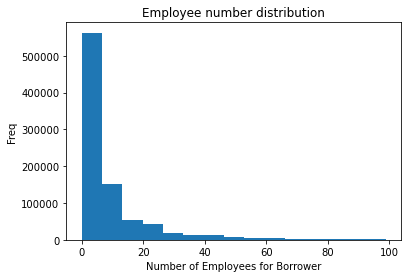

In [49]:
#Create range histogram
#List of business with less than 100 employees
rangelist=[]
for x in banking['NoEmp']:
    if x<100:
        rangelist.append(x)
#Histogram
plt.hist(rangelist, bins=15)
plt.title("Employee number distribution")
plt.xlabel('Number of Employees for Borrower')
plt.ylabel('Freq')
plt.show()

# Takeaways
It took quite a bit of work to get the data into a form we could actually manipulate into and we ended up with a large amount of columns due to dummy variables for US States as well as the industry each specific borrower belongs to. 

There were no real distinct patterns between columns which may mean that the relationship between the columns which means their were not any collinearity issues. There werent many strong relationships in magnitude to the target variable but a strong model can still be created considering many inputs and observations.




In [50]:
#Export CSV
banking.to_csv(r'C:\Users\olive\OneDrive\Documents\Lab Work IOD\Presentations\Capstone\cleandata.csv', index=False)